In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
from simple_wta import WTAProblem, random_wta_factory
import ahuja
from matplotlib import pyplot as plt

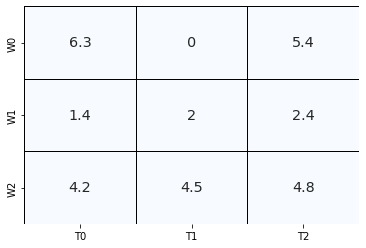

In [11]:
# heatmap of WTA problem data with assignments, shaded accordingly
rng = np.random.RandomState(seed=1)
n_w = 3; n_t = 3
prob = random_wta_factory(n_w,n_t,rng=rng)
anno_data = prob.v*prob.p
data = 0*np.ones((n_w,n_t))
columns = ["T%d"%i for i in range(n_t)]
rows = ["W%d"%i for i in range(n_w)]
df = pd.DataFrame(data,index=rows,columns=columns)
text_ops = {"fontsize" : "x-large"}
sns.heatmap(df,cbar=False,cmap='Blues', linecolor='black',linewidths=1,annot=anno_data,annot_kws=text_ops)
plt.savefig("figures/3x3_0.png")

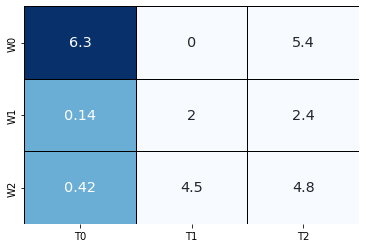

In [12]:
# plot showing how assigning a weapon to a target changes 
# the value that will be achieved by other assignments

# assign weapon 3 to target 1 and compute the survival probability
p = prob.p.copy()
v = prob.v.copy()
x = -1*np.ones(n_w)
x[0]=0
def utility(x):
    u = np.zeros((n_w,n_t))
    for i in range(n_w):
        for j in range(n_t):
            q = np.prod([1-p[k,j] for k in range(n_w) if (k!=i and x[k]==j)])
            u[i,j] = v[j]*q*p[i,j]
    return u
u = utility(x)
data[0,0] = 2
data[1:,0] = 1
df = pd.DataFrame(data,index=rows,columns=columns)
sns.heatmap(df,cbar=False,cmap='Blues', linecolor='black',linewidths=1,annot=u,annot_kws=text_ops)
plt.savefig("figures/3x3_1.png")

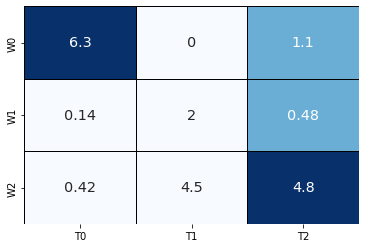

In [13]:
x[2] = 2
u = utility(x)
data[1:,0] = 0
data[0:2,2] = 1
data[2,2] = 2
df = pd.DataFrame(data,index=rows,columns=columns)
sns.heatmap(df,cbar=False,cmap='Blues', linecolor='black',linewidths=1,annot=u,annot_kws=text_ops)
plt.savefig("figures/3x3_2.png")

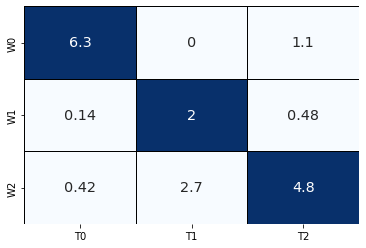

In [14]:
x[1] = 1
u = utility(x)
data[0:2,2] = 0
data[1,1] = 2
df = pd.DataFrame(data,index=rows,columns=columns)
sns.heatmap(df,cbar=False,cmap='Blues', linecolor='black',linewidths=1,annot=u,annot_kws=text_ops)
plt.savefig("figures/3x3_3.png")

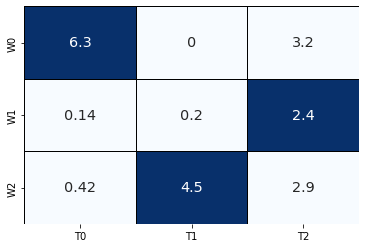

In [15]:
assignment = ahuja.optimize(prob)
u = utility(assignment)
data = np.zeros((n_w,n_t))
for i in range(n_w):
    data[i,assignment[i]] = 1
df = pd.DataFrame(data,index=rows,columns=columns)
sns.heatmap(df,cbar=False,cmap='Blues', linecolor='black',linewidths=1,annot=u,annot_kws=text_ops)
plt.savefig("figures/3x3_4.png")